# Introduction: 
In this project, we will be using python and different metrics to come to a conclusion on which Pittsburgh neighborhood is best. We came up with our metrics by thinking about what we valued in everyday life. The three factors that we came up with were a sense of community, fitness/working out, and cheap parking. These three values/factors led us to use the datasets that we did: community center attendence, obesity rates, and parking meter rates. Some alternatives that we explored were tree count and air quality as we thought the number of tress and air quality went hand in hand. However, the air quality data set was about different counties in Allegheny County and not neighborhoods in Pittsburgh so we abandoned that route. 

# Metrics:
The features that we will be measuring, as mentioned in our introduction, are community center attendence, obesity rates, and parking meter rates. Obesity rates will tell us about the important of fitness in each neighborhood. Community center attendence will tell us how involved the residents are in there neighborhood. Lastly, parking meter rates will tell us about the average price of parking in a specific neighborhood. However, for parking meter rates, we want to make sure that the prices are not too low because this may be an indicator that people do not want to visit a specific neighborhood. We will weight all three metrics equally in our final decision.
### Datasets
Community Center Attendence Link: https://data.wprdc.org/dataset/daily-community-center-attendance/resource/b7cb30c8-b179-43ff-8655-f24880b0f578 \
Obesity Rates link: https://data.wprdc.org/dataset/allegheny-county-obesity-rates/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa?view_id=623baf47-90d4-4745-b17f-6b1f14849d76 \
Rarking Meter Rates link: https://data.wprdc.org/dataset/parking-meters-pittsburgh-parking-authority

In [13]:
import pandas as pd
import geopandas
import matplotlib.pyplot as mp
%matplotlib inline

In [14]:
# import community center dataset
cca = pd.read_csv("NBCT.csv")
#### filter to important info
best = cca.groupby("neighborhood").mean()['attendance_count']
best.sort_values(ascending=False).head(10)

neighborhood
Highland Park               263.000000
Squirrel Hill South         146.000000
Greenfield                   72.583813
Shadyside                    71.666667
South Side FLats             67.125000
South Side Slopes            65.452751
Bedford Dwellings            63.771700
Brookline                    61.305609
South Side Flats             56.737705
Lincoln-Lemington-Belmar     56.035326
Name: attendance_count, dtype: float64

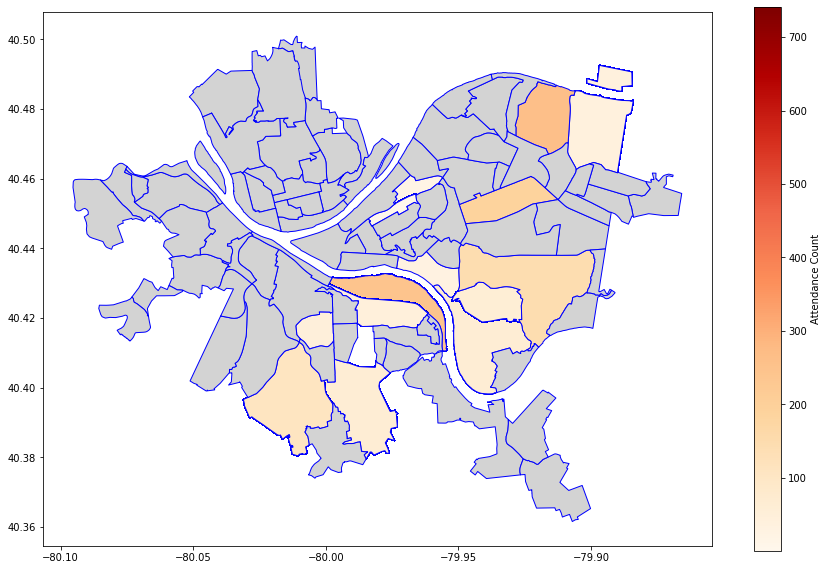

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
NBCT_map.plot(column='attendance_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Attendance Count"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Community Center Analysis

In terms of community center attendence, it is clear from both the list and graph, the top 5 best neighborhoods are Highland Park, Squirrel Hill South, Greenfield, Shadyside, and South Side FLats

In [24]:
# import dataset
cca = pd.read_csv("Obesity1.csv")
#### filter to important info
best = cca.groupby("neighborhood").mean()['obesity']
best.sort_values(ascending=True).head(10)

neighborhood
North Oakland          0.104579
North Shore            0.121487
Squirrel Hill North    0.125941
Shadyside              0.127718
Central Oakland        0.128668
North oakland          0.155867
Regent Square          0.160133
Point Breeze           0.167494
Squirrel Hill South    0.172928
Allegheny West         0.206399
Name: obesity, dtype: float64

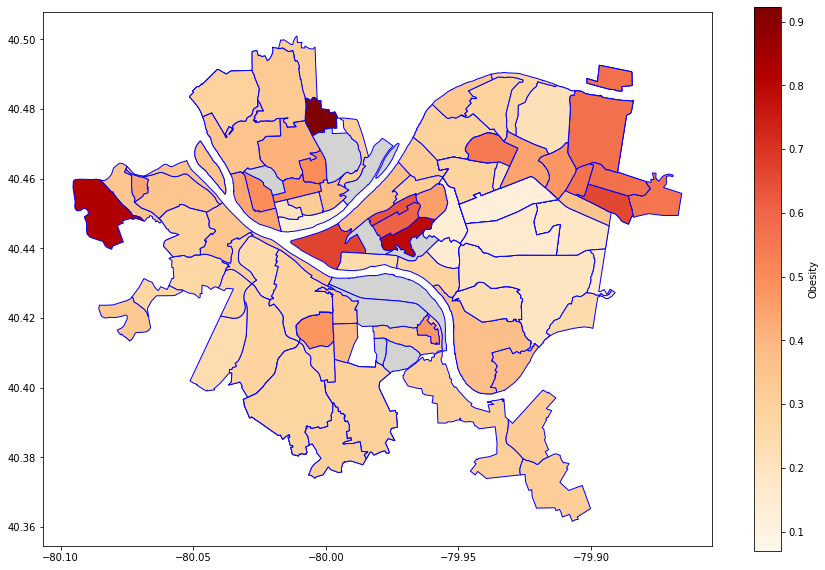

In [25]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
NBCT_map.plot(column='obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Obesity Rates Analysis

In terms of obesity rates, it is clear from both the list and graph, the top 5 neighborhoods with the lowest obesity rates are North Oakland, North Shore, Squirrel Hill North, Shadyside and Central Oakland.

In [27]:
# import data
df = pd.read_csv("parking.csv")
# only look at the node (neighborhood) and rate columns
df = df[['node', 'rates']]
# get rid of $ character in rate columns so we can treat the values as ints
df['rates'] = df['rates'].str.slice(1)
# convert String to in
df["rates"] = pd.to_numeric(df["rates"])
# get average of rates at each node
best = df.groupby("node").mean()['rates']
# sort from greatest to lowest to get a feel for data
best.sort_values(ascending=False).head(8)

node
Downtown         4.000000
North Shore      3.000000
Oakland          2.929398
Uptown           1.500000
Strip Distri*    1.500000
Squirell Hill    1.500000
East Liberty     1.500000
ShadySide        1.500000
Name: rates, dtype: float64

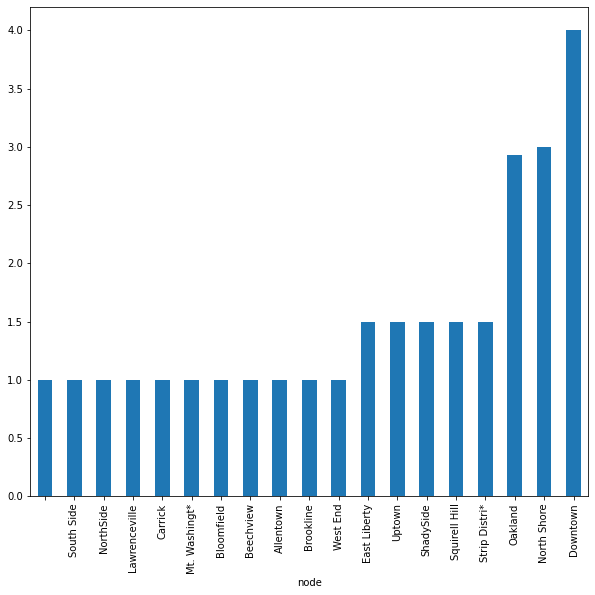

In [21]:
# graph data
best.sort_values(ascending=True).plot(x="node", y="rates", kind="bar", figsize=(10, 9))
mp.show()

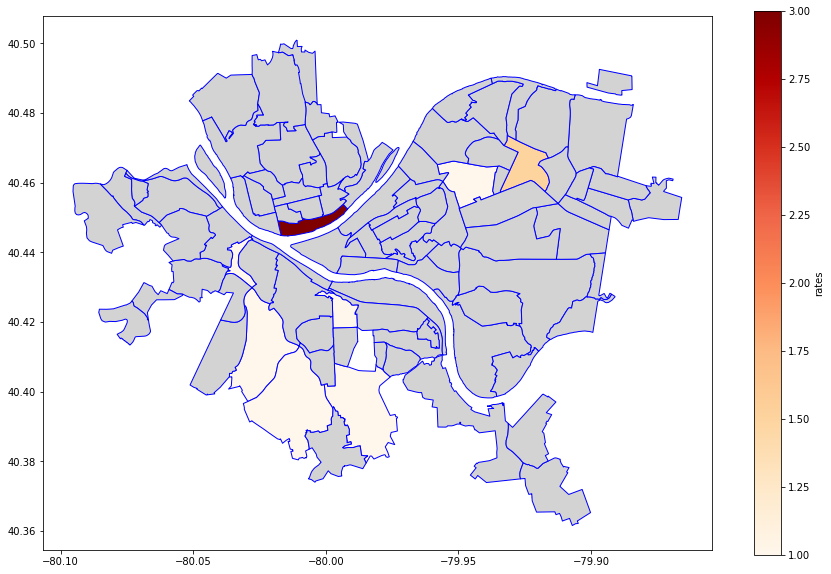

In [23]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(best, how='left', left_on='hood', right_on='node')
NBCT_map.plot(column='rates', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "rates"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Obesity Rates Analysis

In terms of parking rates, it is clear from both the list and graph, the top 5 neighborhoods with the best rates are Uptown, Strip Distric, Squirell Hill, East Liberty and ShadySide. We defined "best" parking rates as rates that are not too low and not too high. In this case we determined the best parking meter rate to be $1.50

# Conclusion

If we look at the top five neighborhoods for each metric, it is clear to see that one neighborhood in particular always pops up. That neighborhood is Squirrel Hill. So although, Squirrel Hill is not the best at any one metric it consistently performed well with each metric which is why we concluded Squirrel Hill as the best Pittsburgh neighborhood.

### Gordon's Reflection:
This determination of best neighborhood matches extremley well with my personal favorite neighborhood. I work at a resterant in Squirrel Hill so I am around there very often. I feel that Squirrel Hill is extremley modern and caters well to the younger generation as it has a great mix of stores, resterants, greenery and housing. Furthermore, I just like the overall vibe and culture of the neighborhood.

### Kineche's Reflection:

I also agree with our conclusion of Squirrel Hill North being the best neighborhood. Personally, my two favorite neighborhoods are ShadySide and Squirrel Hill North. However, after looking at the data I have decided I like Squirrel Hill North more than ShadySide. I often go to Squirrel Hill North to eat with friends and 